1. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

2. Train and Test set

In [2]:
df = fetch_20newsgroups()
train = fetch_20newsgroups(subset='train', categories=df.target_names) 
test = fetch_20newsgroups(subset='test', categories=df.target_names)

In [4]:
#To view a sample data
print (train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

**We use *' TfidfVectorizer '* to count the no.of occurences of each words in each article and assign weights to each words accordingly**

3. Importing necessary package and creating model

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

4. Model Evaluation

Text(113.99999999999999, 0.5, 'Predicted')

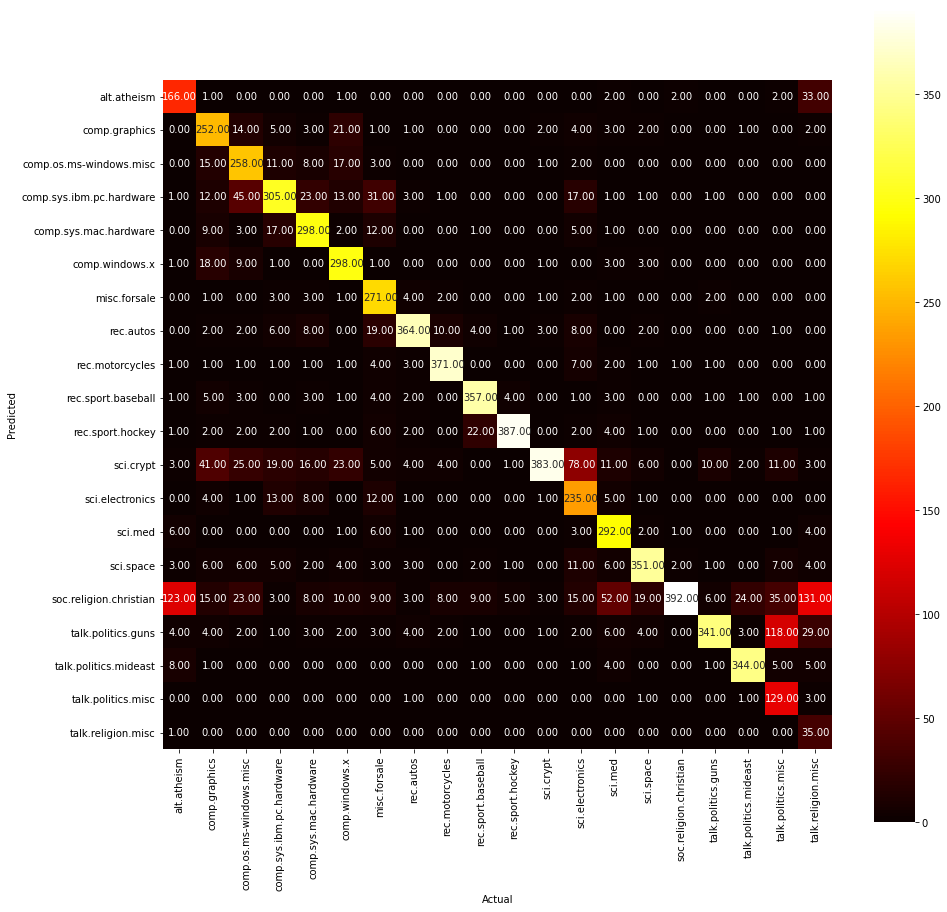

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (15,15)
cm = confusion_matrix(test.target, labels)
sns.heatmap(cm.T, xticklabels= train.target_names, yticklabels=train.target_names, square=True, cmap = 'hot', annot = True, fmt = '.2f'  )
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [34]:
from sklearn.metrics import classification_report
print (classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

The model has good Accuracy, Precision and Recall score for each category!

5. Predicting text in real-time using our Model

In [31]:
def predict_category(text, model = model, train = train):
  pred = model.predict([text])
  return train.target_names[pred[0]]

In [32]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [24]:
predict_category('Space shuttle took off')

'sci.space'